In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df= pd.read_csv(r'C:\Users\Armado\Documents\GitProjects\EDA_Proyecto\data\raw\timeforcasting.csv')
df

,User ID,Order Id,Product Id,Price,Time
0,6365,10147,7575.0,175.0,2019-03-22T00:20:26+00:00
1,1,10148,7575.0,175.0,2019-03-22T00:20:26+00:00
2,0,10146,5633.0,4.5,2019-03-20T12:42:18+00:00
3,6290,10144,7574.0,175.0,2019-03-19T19:47:17+00:00
4,1,10145,5593.0,3.5,2019-03-19T19:47:17+00:00
...,...,...,...,...,...
1508,0,6067,NaN,20.0,2014-02-13T23:43:19+00:00
1509,0,6066,NaN,20.0,2014-02-13T21:04:30+00:00
1510,0,6065,NaN,20.0,2014-02-13T20:27:19+00:00
1511,5196,6064,NaN,20.0,2014-02-13T00:35:55+00:00


#Notas relativas al dataset:
Un User ID aparece multiples veces con diferentes Product ID con diferentes valores de Time,  esto sugiere que un usuario crea una orden de pedido, dento de la orden se recogen los diferentes productos. La Fecha y hora de la operación parece estar asignada poer orden.

In [39]:
''' Descriptivos'''
#a contiinuación se generan los descriptivos de las variables del dataset
df.describe(include='all')

,User ID,Order Id,Product Id,Price,Time
count,1513.000000,1513.000000,1460.000000,1513.000000,1513
unique,NaN,NaN,NaN,NaN,1499
top,NaN,NaN,NaN,NaN,2019-03-05T18:23:02+00:00
freq,NaN,NaN,NaN,NaN,2
mean,3108.943159,6844.588896,118.500000,112.688420,NaN
std,2520.000520,542.457749,888.892554,175.592896,NaN
min,0.000000,6064.000000,0.000000,0.000000,NaN
25%,0.000000,6441.000000,0.000000,12.000000,NaN
50%,3941.000000,6819.000000,0.000000,25.000000,NaN
75%,5311.000000,7197.000000,0.000000,144.000000,NaN


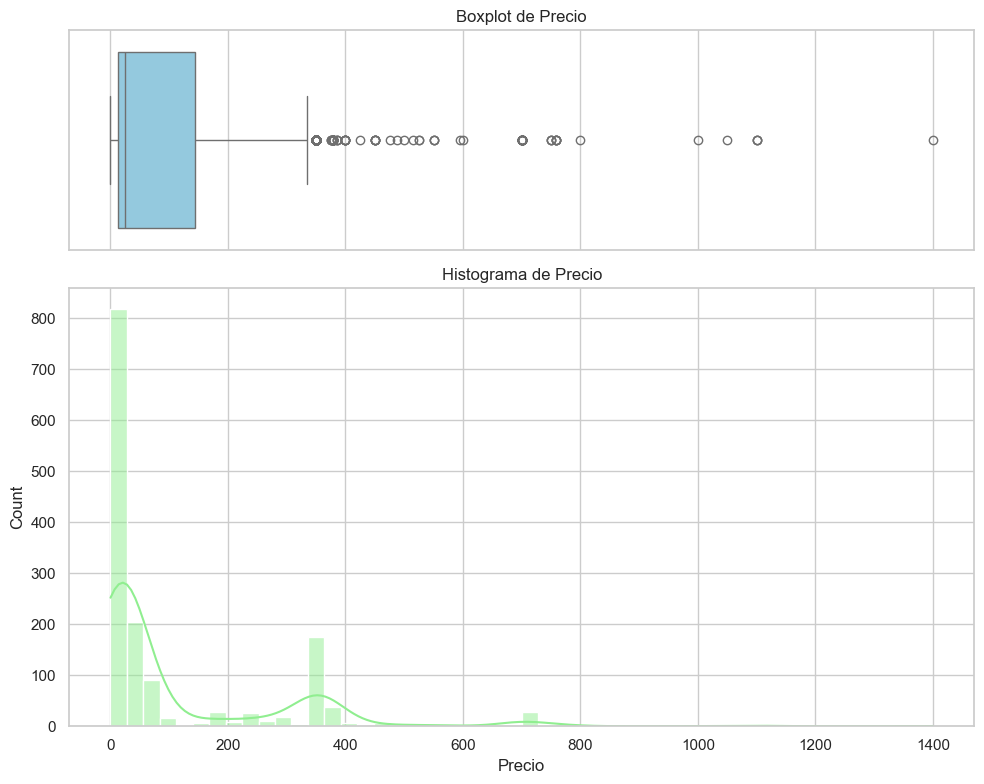

In [40]:

# Estilo visual
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [1, 2]})
# Boxplot
sns.boxplot(x=df['Price'], ax=axes[0], color='skyblue')
axes[0].set(title='Boxplot de Precio')
# Histograma
sns.histplot(x=df['Price'], ax=axes[1], bins=50, kde=True, color='lightgreen')
axes[1].set(title='Histograma de Precio', xlabel='Precio')
plt.tight_layout()
plt.show()

#Comentarios del descriptivo
 - Se puede observar que hay ciertos elementos de la columna User ID==0, esto se puede deber a datos faltantes, posiblemente por errores de sistema o de registro,  a veces tambien se usa un usuario neutro para hacer test de ordenes u opciones similares,  algo parecido pasa con el  user ID ==1.

 - Solo se tienen 1460 registrso validos para Product Id,  por lo que hay 53 valores faltantes.

 - La disperción de los datos es alta para la variable Price, hay demasiados productos con precio 0, la mayoría son menores de 400 pesos, pero el máximo es de 1400
- Adcionalmente hay 52 ordenes de producto distintas pero sin un producto asociado, aunque si tienen precio, la mayoría de estas ordenes pertenecen a Usuarios tipo 0.






In [41]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.tz_localize(None)
df['year'] = df['Time'].dt.year
df['month'] = df['Time'].dt.month
df.head(5)

,User ID,Order Id,Product Id,Price,Time,year,month
0,6365,10147,7575.0,175.0,2019-03-22 00:20:26,2019,3
1,1,10148,7575.0,175.0,2019-03-22 00:20:26,2019,3
2,0,10146,5633.0,4.5,2019-03-20 12:42:18,2019,3
3,6290,10144,7574.0,175.0,2019-03-19 19:47:17,2019,3
4,1,10145,5593.0,3.5,2019-03-19 19:47:17,2019,3


In [42]:
df[df['User ID'].isin([0, 1])]

,User ID,Order Id,Product Id,Price,Time,year,month
1,1,10148,7575.0,175.0,2019-03-22 00:20:26,2019,3
2,0,10146,5633.0,4.5,2019-03-20 12:42:18,2019,3
4,1,10145,5593.0,3.5,2019-03-19 19:47:17,2019,3
6,1,10143,7574.0,175.0,2019-03-19 19:39:57,2019,3
8,1,10141,7575.0,175.0,2019-03-06 23:20:42,2019,3
...,...,...,...,...,...,...,...
1506,0,6069,NaN,20.0,2014-02-14 17:51:38,2014,2
1507,0,6068,NaN,20.0,2014-02-14 15:42:10,2014,2
1508,0,6067,NaN,20.0,2014-02-13 23:43:19,2014,2
1509,0,6066,NaN,20.0,2014-02-13 21:04:30,2014,2


# Mantenemos usuarios 0 o 1?
Se percibe que la cantidad de registros que pertenecen a usuarios 0 o 1 son aprox la tercera parte del total (37%) por lo que es importante estar seguros de que al quitarlos no se perderá una parte importante de los datos.

    - Veamos si tiene un Producto ID valido, buscando la proporción de esos registros que  tiene un Product Id.
    - Tabien se busca saber si existe un precio para esos registros.
    - Revisamos si tienen fechas validas
    - Verificamos las ordenes distintas para esos registros



# Criterio para saber si eliminar los registros User ID in (0, 1)

Sí la proporción de tales registros que tiene un Product Id valido es pequeña, significa que en general los usuarios 0 y 1 no son relevantes ya que no continen ordenes con productos validos: se usa notna para comparar. se usa tambien "!=0"

Si tiene precios inconsistentes, se pueden eliminar

Si no cuentan con un registro valido de fecha, se pueden eliminar

Si los Product_ID==0 pueden ser productos no válidos, si la proporcion es baja se podrían eliminar


In [43]:
# tabla pivote: frecuencia de Product ID
pivot_product = pd.pivot_table(df, 
                             index='Product Id',
                             aggfunc='size',
                             fill_value=0)
pivot_product.sort_values(ascending=False).head(10)

Product Id
0.0       1434
5756.0      11
7574.0       7
7575.0       6
5593.0       1
5633.0       1
dtype: int64

In [44]:
# tabla pivote: frecuencia de Product ID
pivot_product = pd.pivot_table(df, 
                             index='Price',
                             aggfunc='size',
                             fill_value=0)
pivot_product.sort_values(ascending=False).head(10)

Price
350.00    174
0.00       62
20.00      54
21.00      44
9.00       43
10.50      34
35.00      31
378.88     31
14.00      31
3.50       31
dtype: int64

In [45]:
print("proporcion de nulos:")
print(1-df[df['User ID'].isin([0, 1])]['Product Id'].notna().mean())
mask = df['User ID'].isin([0, 1])
print("proporcion de ceros ó nulos:")
prop_basura = ((df.loc[mask, 'Product Id'].isna()) | (df.loc[mask, 'Product Id'] == 0)).mean()
print(prop_basura)

proporcion de nulos:
0.07964601769911506
proporcion de ceros ó nulos:
0.9699115044247788


# Limpieza del dataset

La proporcion de registros invalidaos por ser nulls en Porduct ID es del 7%, pero la proporcion de datos nulls con datos ==0 para elñ mismo campo es mas del 90%

En conclusión no se pueden eliminar tan facil los registros de los usuarios 1, 0.

Sin embargo, queda claro que las ventas =0 no reflejan informacion de ventas reales.

Priorizando la entrega del proyecto bajo las mejores condiciones asequibles, se opta por continuar con la limpieza sin eliminar tantos registros. No obstante es necesario realizar 3 preguntas a los data owners o reunirse con el área comercial: 1.- ¿Que representan los usuarios 0, 1? 2.- ¿A qué se refieren los precios = 0? ¿A qué se debe la ausencia de registros de Product ID y Product ID ==0?

Se decide que la limpieza de los datos solo implicará df['Price'] > 0 y se imputarán los datos nulls de Product ID con ceros

In [46]:
df = df[df['Price'] > 0].copy()
df['Product Id'] = df['Product Id'].fillna(0)
df['Product Id'] = df['Product Id'].astype(int)
df

,User ID,Order Id,Product Id,Price,Time,year,month
0,6365,10147,7575,175.0,2019-03-22 00:20:26,2019,3
1,1,10148,7575,175.0,2019-03-22 00:20:26,2019,3
2,0,10146,5633,4.5,2019-03-20 12:42:18,2019,3
3,6290,10144,7574,175.0,2019-03-19 19:47:17,2019,3
4,1,10145,5593,3.5,2019-03-19 19:47:17,2019,3
...,...,...,...,...,...,...,...
1508,0,6067,0,20.0,2014-02-13 23:43:19,2014,2
1509,0,6066,0,20.0,2014-02-13 21:04:30,2014,2
1510,0,6065,0,20.0,2014-02-13 20:27:19,2014,2
1511,5196,6064,0,20.0,2014-02-13 00:35:55,2014,2


In [47]:
# Ordenar precios de menor a mayor
df_sorted = df.sort_values('Price', ascending=True)
print("Distribución de precios ordenados:")
print("\nPrimeros 10 precios más bajos:")
print(df_sorted['Price'].head(10))
print("\nÚltimos 10 precios más altos:")
print(df_sorted['Price'].tail(10))

Distribución de precios ordenados:

Primeros 10 precios más bajos:
800     2.5
4       3.5
648     3.5
1387    3.5
1350    3.5
701     3.5
720     3.5
61      3.5
1329    3.5
1295    3.5
Name: Price, dtype: float64

Últimos 10 precios más altos:
1322     757.75
1213     757.75
1283     757.75
1066     800.00
116     1000.00
119     1050.00
810     1100.00
849     1100.00
1049    1100.00
939     1400.00
Name: Price, dtype: float64


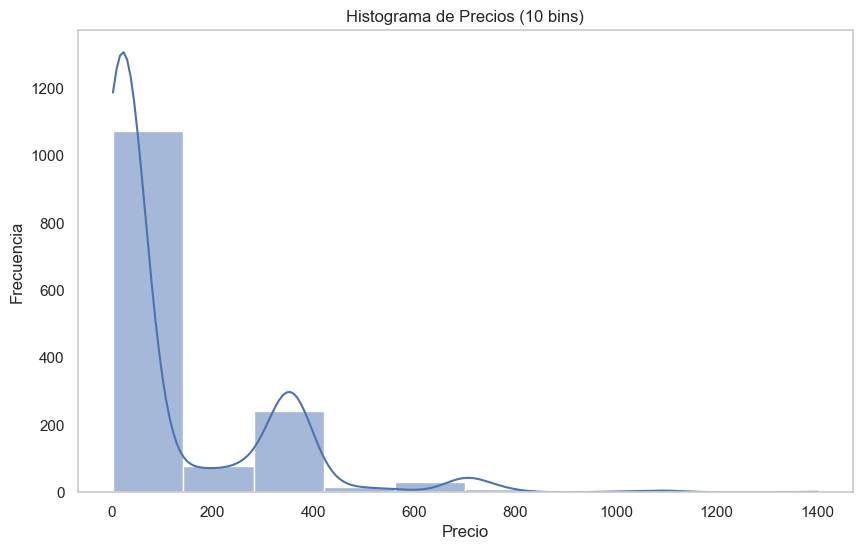

In [52]:
# Crear histograma con 10 bins
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=10, kde=True)
plt.title('Histograma de Precios (10 bins)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

Outliers y valores extremos:
A decir del histograma inicial y del actual, se puede apreciar una muy pequeña venta de productos de alto precio. En orden de obtener los mejores insights (en cantidad y calidad), es importante entender la estructura de los datos que son mayoría. Por lo cual hacemos una prueba para ello, mediante la eliminación de los valores extremos.

Comenzamos Con el métono mas elemental (Rango intercuartílico).


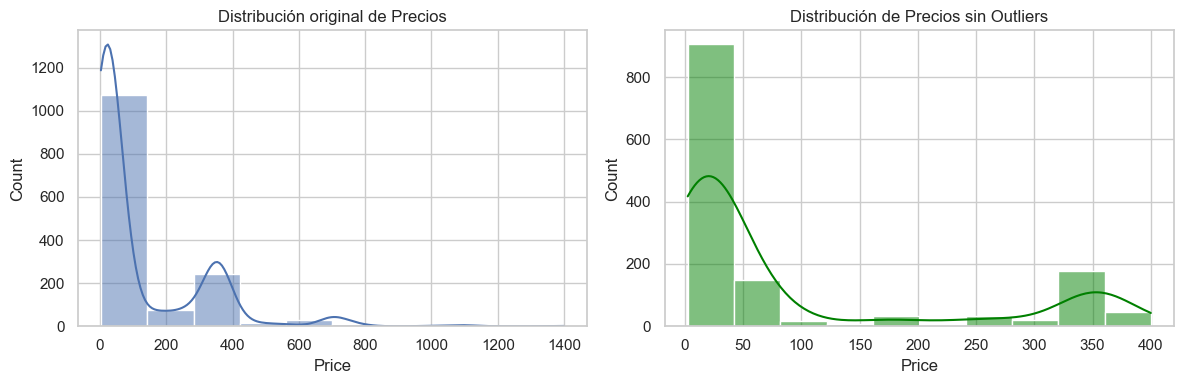

In [ ]:
# Calculamos los cuartiles y definimos los limites sup e inf
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
RI = Q3 - Q1
limite_inferior = Q1 - 1.5 * RI
limite_superior = Q3 + 1.5 * RI

# eliminando valores extremos
df_filtrado = df[(df['Price'] >= limite_inferior) & (df['Price'] <= limite_superior)]

# Histograma antes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=10, kde=True)
plt.title('Distribución original de Precios')

# Histograma después
plt.subplot(1, 2, 2)
sns.histplot(df_filtrado['Price'], bins=10, kde=True, color='green')
plt.title('Distribución de Precios sin Outliers')

plt.tight_layout()
plt.show()

#Distribución Multiimodal
La distribución multimodal parece ser una característica del dataset, aun habiendo limpiado los valores extremos, se visualiza 

Incluso después de la eliminación de outliers, la distribución sigue sin ser normal y conserva una clara bimodalidad Hay dos "picos" prominentes: uno muy alto cerca de los precios bajos y otro más pequeño despues de 300 pesos.

En mi experiencia, esta estructura representa productos de bajo precio altamente demandados, como productos de primera necesidad o perecederos, y los productos de precio relativamente altos pueden deberse a dos tipos de productos: ya bien prodctos gourmet o premium, o bien productos que no son de primera necesidad pero muy demandados tambien, por ejemplo ropa o cosmeticos.

Los productos que Superaban los 1000 pesos podrían corresponder al área de electrónica o de vinos y licores.


# Serie temporal
A continuación se grafica la serie temporal de los datos y de los datos filtrados

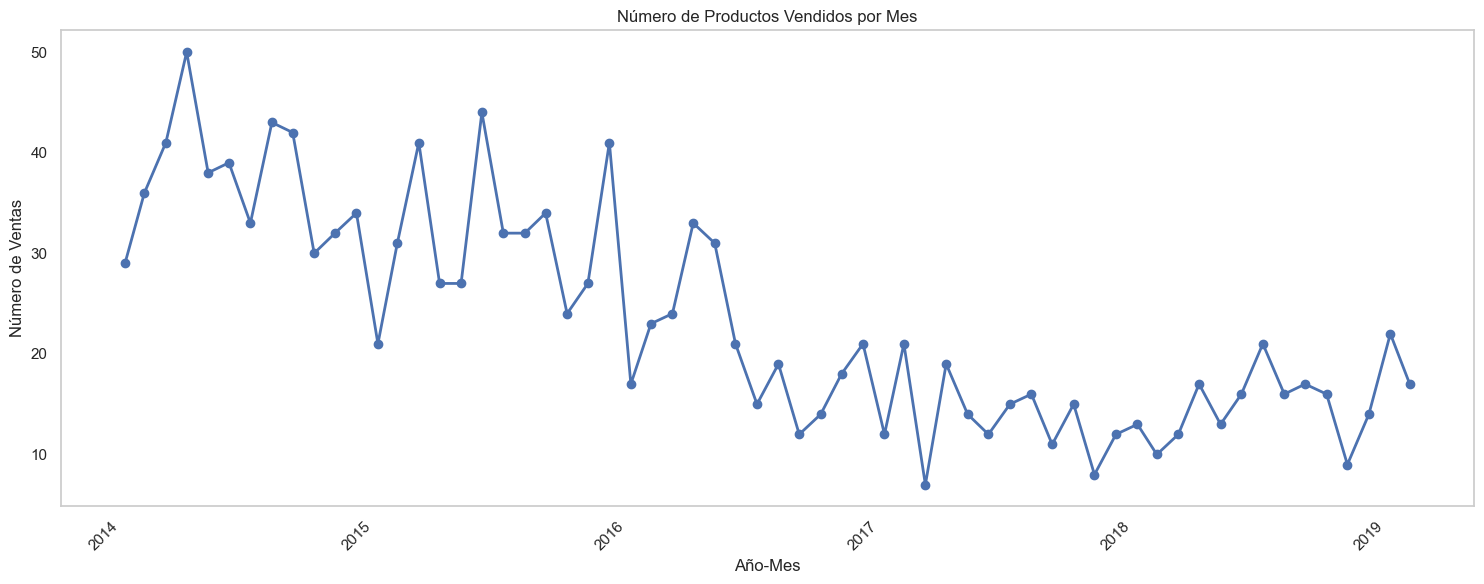


Estadísticas de ventas mensuales:

Mes con más ventas:
     Aniomes  Product Id
6 2014-05-01          50

Mes con menos ventas:
      Aniomes  Product Id
41 2017-04-01           7

Promedio mensual de ventas: 23.4


In [57]:

df['Aniomes']=df['year'].astype(str) + '-' + df['month'].astype(str)
# Agrupar y contar ventas por mes
ventas_mensuales = df.groupby('Aniomes')['Product Id'].count().reset_index()
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')  # Ordenar por fecha
# Asegurar que 'Aniomes' sea tipo datetime
ventas_mensuales['Aniomes'] = pd.to_datetime(ventas_mensuales['Aniomes'])

# Ordenar correctamente por fecha
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')
# Crear gráfico de serie temporal
plt.figure(figsize=(15, 6))
plt.plot(ventas_mensuales['Aniomes'], ventas_mensuales['Product Id'], 'b-o', linewidth=2)
plt.title('Número de Productos Vendidos por Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Ventas')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estadísticas mensuales
print("\nEstadísticas de ventas mensuales:")
print("\nMes con más ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=False).head(1))
print("\nMes con menos ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=True).head(1))
print("\nPromedio mensual de ventas:", ventas_mensuales['Product Id'].mean().round(2))

C:\Users\Armado\AppData\Local\Temp\ipykernel_20400\3393308571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Aniomes']=df_filtrado['year'].astype(str) + '-' + df_filtrado['month'].astype(str)


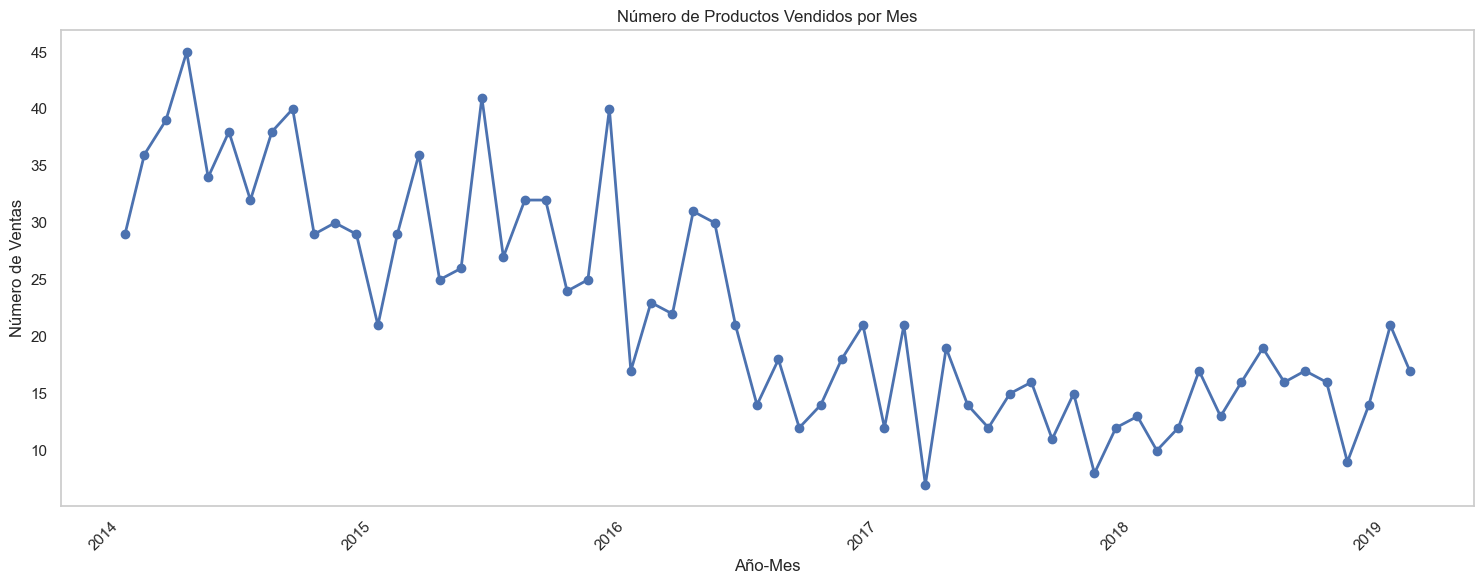


Estadísticas de ventas mensuales:

Mes con más ventas:
     Aniomes  Product Id
6 2014-05-01          45

Mes con menos ventas:
      Aniomes  Product Id
41 2017-04-01           7

Promedio mensual de ventas: 22.42


In [59]:

df_filtrado['Aniomes']=df_filtrado['year'].astype(str) + '-' + df_filtrado['month'].astype(str)
# Agrupar y contar ventas por mes
ventas_mensuales = df_filtrado.groupby('Aniomes')['Product Id'].count().reset_index()
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')  # Ordenar por fecha
# Asegurar que 'Aniomes' sea tipo datetime
ventas_mensuales['Aniomes'] = pd.to_datetime(ventas_mensuales['Aniomes'])

# Ordenar correctamente por fecha
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')
# Crear gráfico de serie temporal
plt.figure(figsize=(15, 6))
plt.plot(ventas_mensuales['Aniomes'], ventas_mensuales['Product Id'], 'b-o', linewidth=2)
plt.title('Número de Productos Vendidos por Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Ventas')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estadísticas mensuales
print("\nEstadísticas de ventas mensuales:")
print("\nMes con más ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=False).head(1))
print("\nMes con menos ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=True).head(1))
print("\nPromedio mensual de ventas:", ventas_mensuales['Product Id'].mean().round(2))

Como no hay una diferencia cualitativa en el desarrollo de la serie se decide contnuar con el analisis de la serie filtrada siin valores extremos.

In [61]:
df_filtrado.to_csv(r'C:\Users\Armado\Documents\GitProjects\EDA_Proyecto\data\processed\dataset filtrado.csv', index=False)



In [51]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

# Curva de Demanda
Visualización de la relación entre precio y cantidad vendida para cada producto

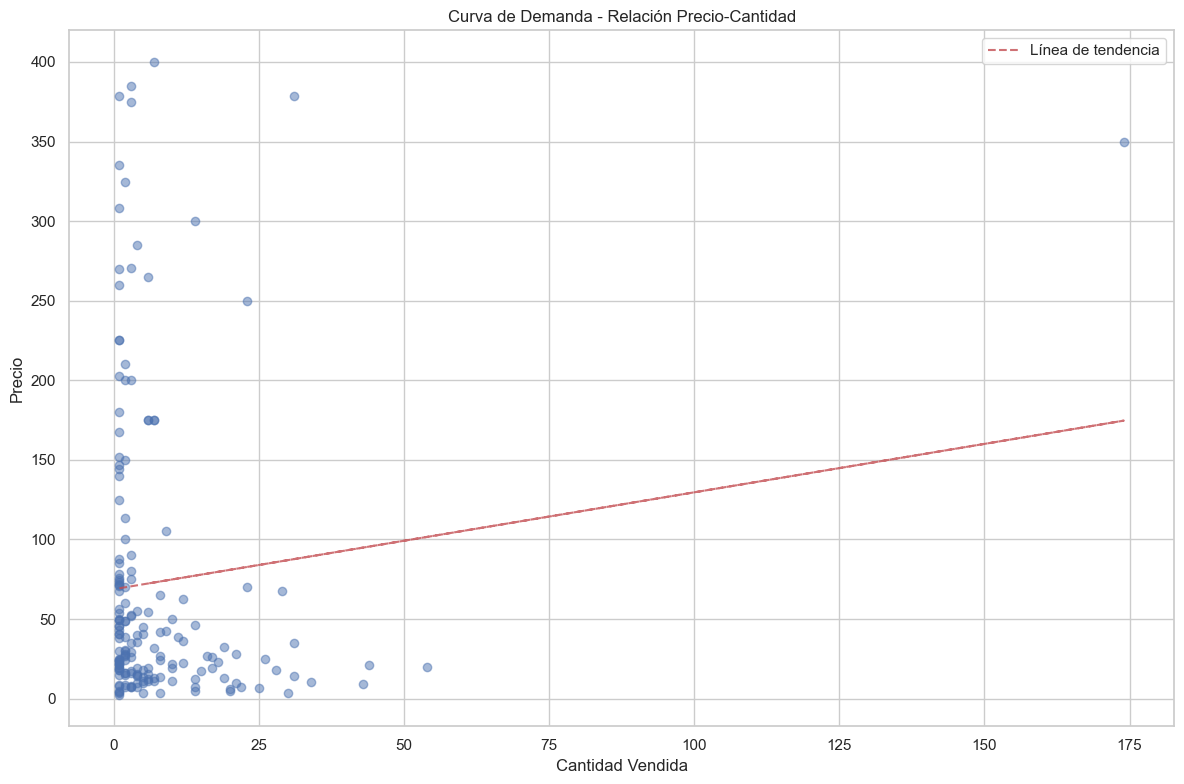


Top 10 productos por cantidad vendida:
Product Id
0       1365
5756      10
7574       7
7575       6
5593       1
5633       1
Name: Cantidad, dtype: int64


In [ ]:
# Calcular la cantidad vendida por producto y precio
demanda = df_filtrado.groupby(['Product Id', 'Price']).size().reset_index(name='Cantidad')

# Crear scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(demanda['Cantidad'], demanda['Price'], alpha=0.5)
plt.title('Curva de Demanda - Relación Precio-Cantidad')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Precio')
plt.grid(True)

# Añadir línea de tendencia
z = np.polyfit(demanda['Cantidad'], demanda['Price'], 1)
p = np.poly1d(z)
plt.plot(demanda['Cantidad'], p(demanda['Cantidad']), "r--", alpha=0.8, label='Línea de tendencia')

plt.legend()
plt.tight_layout()
plt.show()

# Mostrar estadísticas de los productos más vendidos
print("\nTop 10 productos por cantidad vendida:")
top_productos = demanda.groupby('Product Id')['Cantidad'].sum().sort_values(ascending=False).head(10)
print(top_productos)

# Curva de Demanda (Escala Logarítmica)
Visualización de la relación precio-cantidad en escala logarítmica para mejor interpretación de la elasticidad

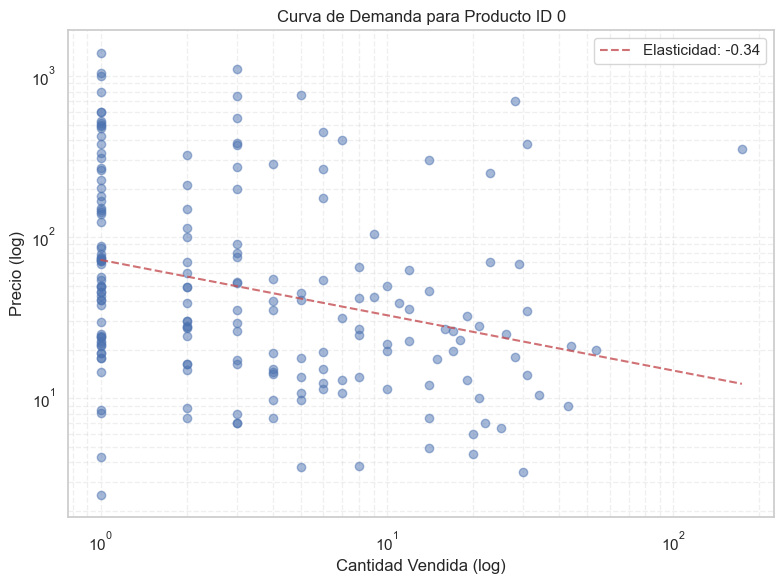

Producto 0 → Elasticidad precio-demanda: -0.34
-----


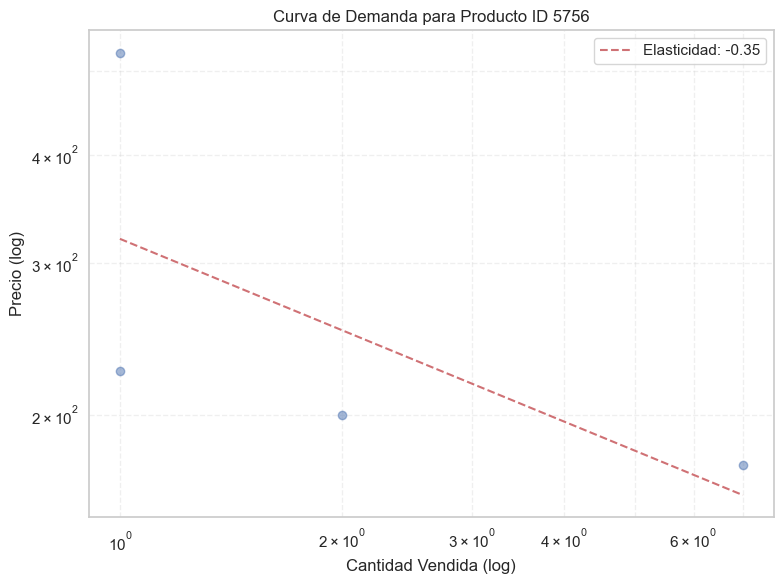

Producto 5756 → Elasticidad precio-demanda: -0.35
-----


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar productos con suficientes datos
productos = demanda['Product Id'].value_counts()
productos_validos = productos[productos >= 2].index

for prod_id in productos_validos:
    df_prod = demanda[demanda['Product Id'] == prod_id]
    
    # Log-transformación
    log_cant = np.log(df_prod['Cantidad'])
    log_precio = np.log(df_prod['Price'])

    # Ajuste de línea
    z = np.polyfit(log_cant, log_precio, 1)
    p = np.poly1d(z)

    # Gráfica
    plt.figure(figsize=(8, 6))
    plt.scatter(df_prod['Cantidad'], df_prod['Price'], alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    x_range = np.linspace(min(log_cant), max(log_cant), 100)
    plt.plot(np.exp(x_range), np.exp(p(x_range)), 'r--', alpha=0.8, 
             label=f'Elasticidad: {z[0]:.2f}')
    
    plt.title(f'Curva de Demanda para Producto ID {prod_id}')
    plt.xlabel('Cantidad Vendida (log)')
    plt.ylabel('Precio (log)')
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"Producto {prod_id} → Elasticidad precio-demanda: {z[0]:.2f}")
    print("-----")


In [ ]:
df['Aniomes']=df['year'].astype(str) + '-' + df['month'].astype(str)

# Serie Temporal de Número de Ventas por Mes
Visualización del número de productos vendidos por mes

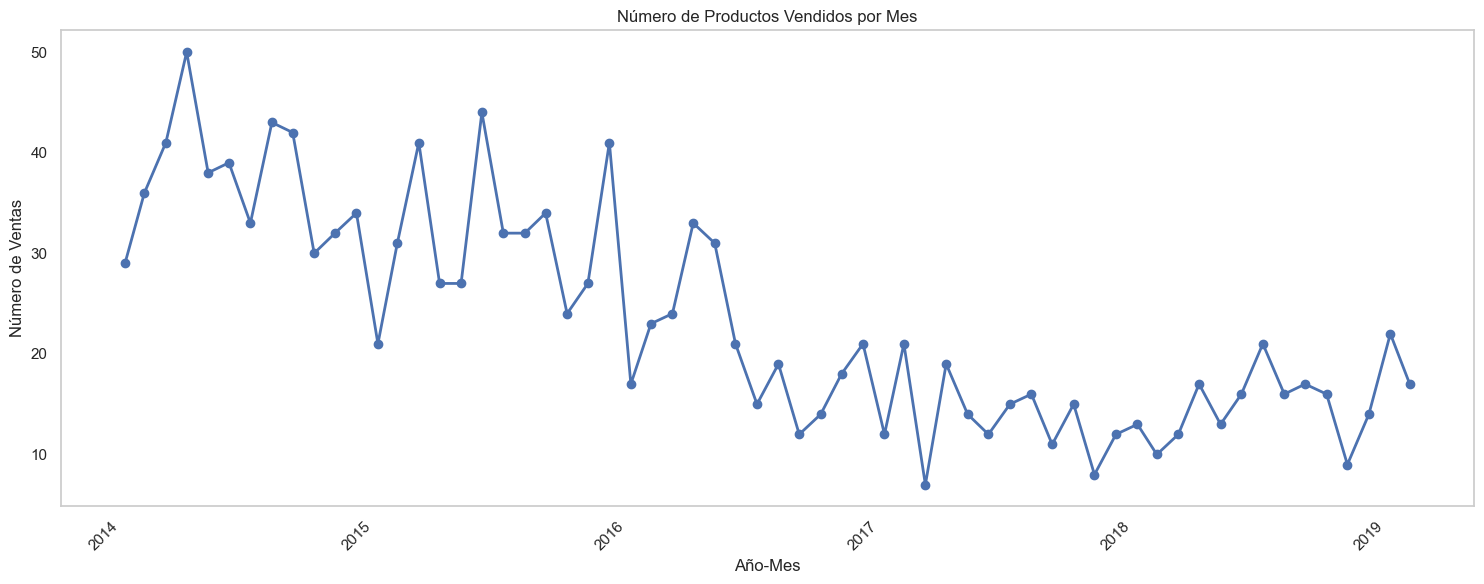


Estadísticas de ventas mensuales:

Mes con más ventas:
     Aniomes  Product Id
6 2014-05-01          50

Mes con menos ventas:
      Aniomes  Product Id
41 2017-04-01           7

Promedio mensual de ventas: 23.4


In [ ]:

# Agrupar y contar ventas por mes
ventas_mensuales = df.groupby('Aniomes')['Product Id'].count().reset_index()
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')  # Ordenar por fecha
# Asegurar que 'Aniomes' sea tipo datetime
ventas_mensuales['Aniomes'] = pd.to_datetime(ventas_mensuales['Aniomes'])

# Ordenar correctamente por fecha
ventas_mensuales = ventas_mensuales.sort_values('Aniomes')
# Crear gráfico de serie temporal
plt.figure(figsize=(15, 6))
plt.plot(ventas_mensuales['Aniomes'], ventas_mensuales['Product Id'], 'b-o', linewidth=2)
plt.title('Número de Productos Vendidos por Mes')
plt.xlabel('Año-Mes')
plt.ylabel('Número de Ventas')
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estadísticas mensuales
print("\nEstadísticas de ventas mensuales:")
print("\nMes con más ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=False).head(1))
print("\nMes con menos ventas:")
print(ventas_mensuales.sort_values('Product Id', ascending=True).head(1))
print("\nPromedio mensual de ventas:", ventas_mensuales['Product Id'].mean().round(2))

Para agrupar usuarios por patrones de compra, podemos aplicar técnicas de clustering, pero primero hay que transformar tus datos para que cada usuario esté representado por características (features) relevantes

In [ ]:
# Asegurar que 'Time' sea tipo datetime
df['Time'] = pd.to_datetime(df['Time'])

# Agrupar por usuario
df_user = df.groupby('User ID').agg(
    total_orders=('Order Id', 'nunique'),
    unique_products=('Product Id', 'nunique'),
    avg_price=('Price', 'mean'),
    total_spent=('Price', 'sum'),
    first_purchase=('Time', 'min'),
    last_purchase=('Time', 'max'),
    months_active=('Aniomes', 'nunique')
).reset_index()

# Convertir fechas a días de antigüedad
df_user['days_between_purchases'] = (df_user['last_purchase'] - df_user['first_purchase']).dt.days


In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['total_orders', 'unique_products', 'avg_price',
            'total_spent', 'months_active', 'days_between_purchases']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_user[features])

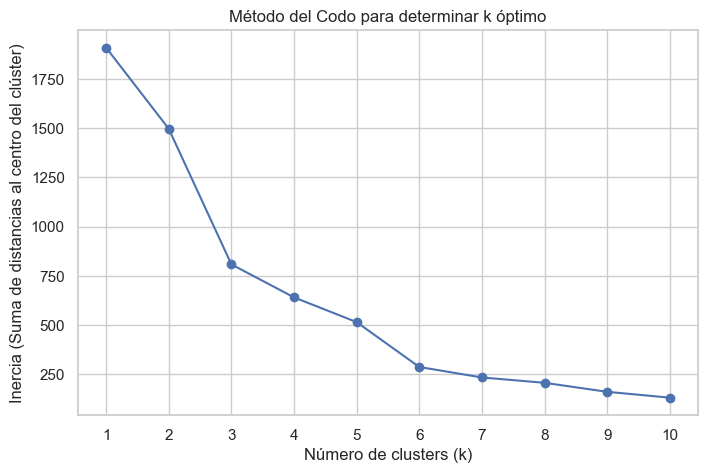

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluar de k=1 a k=10
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Suma de distancias al centro del clúster)')
plt.title('Método del Codo para determinar k óptimo')
plt.grid(True)
plt.xticks(K)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Probar con 3 clústers (puedes ajustar)
kmeans = KMeans(n_clusters=3, random_state=42)
df_user['cluster'] = kmeans.fit_predict(X_scaled)


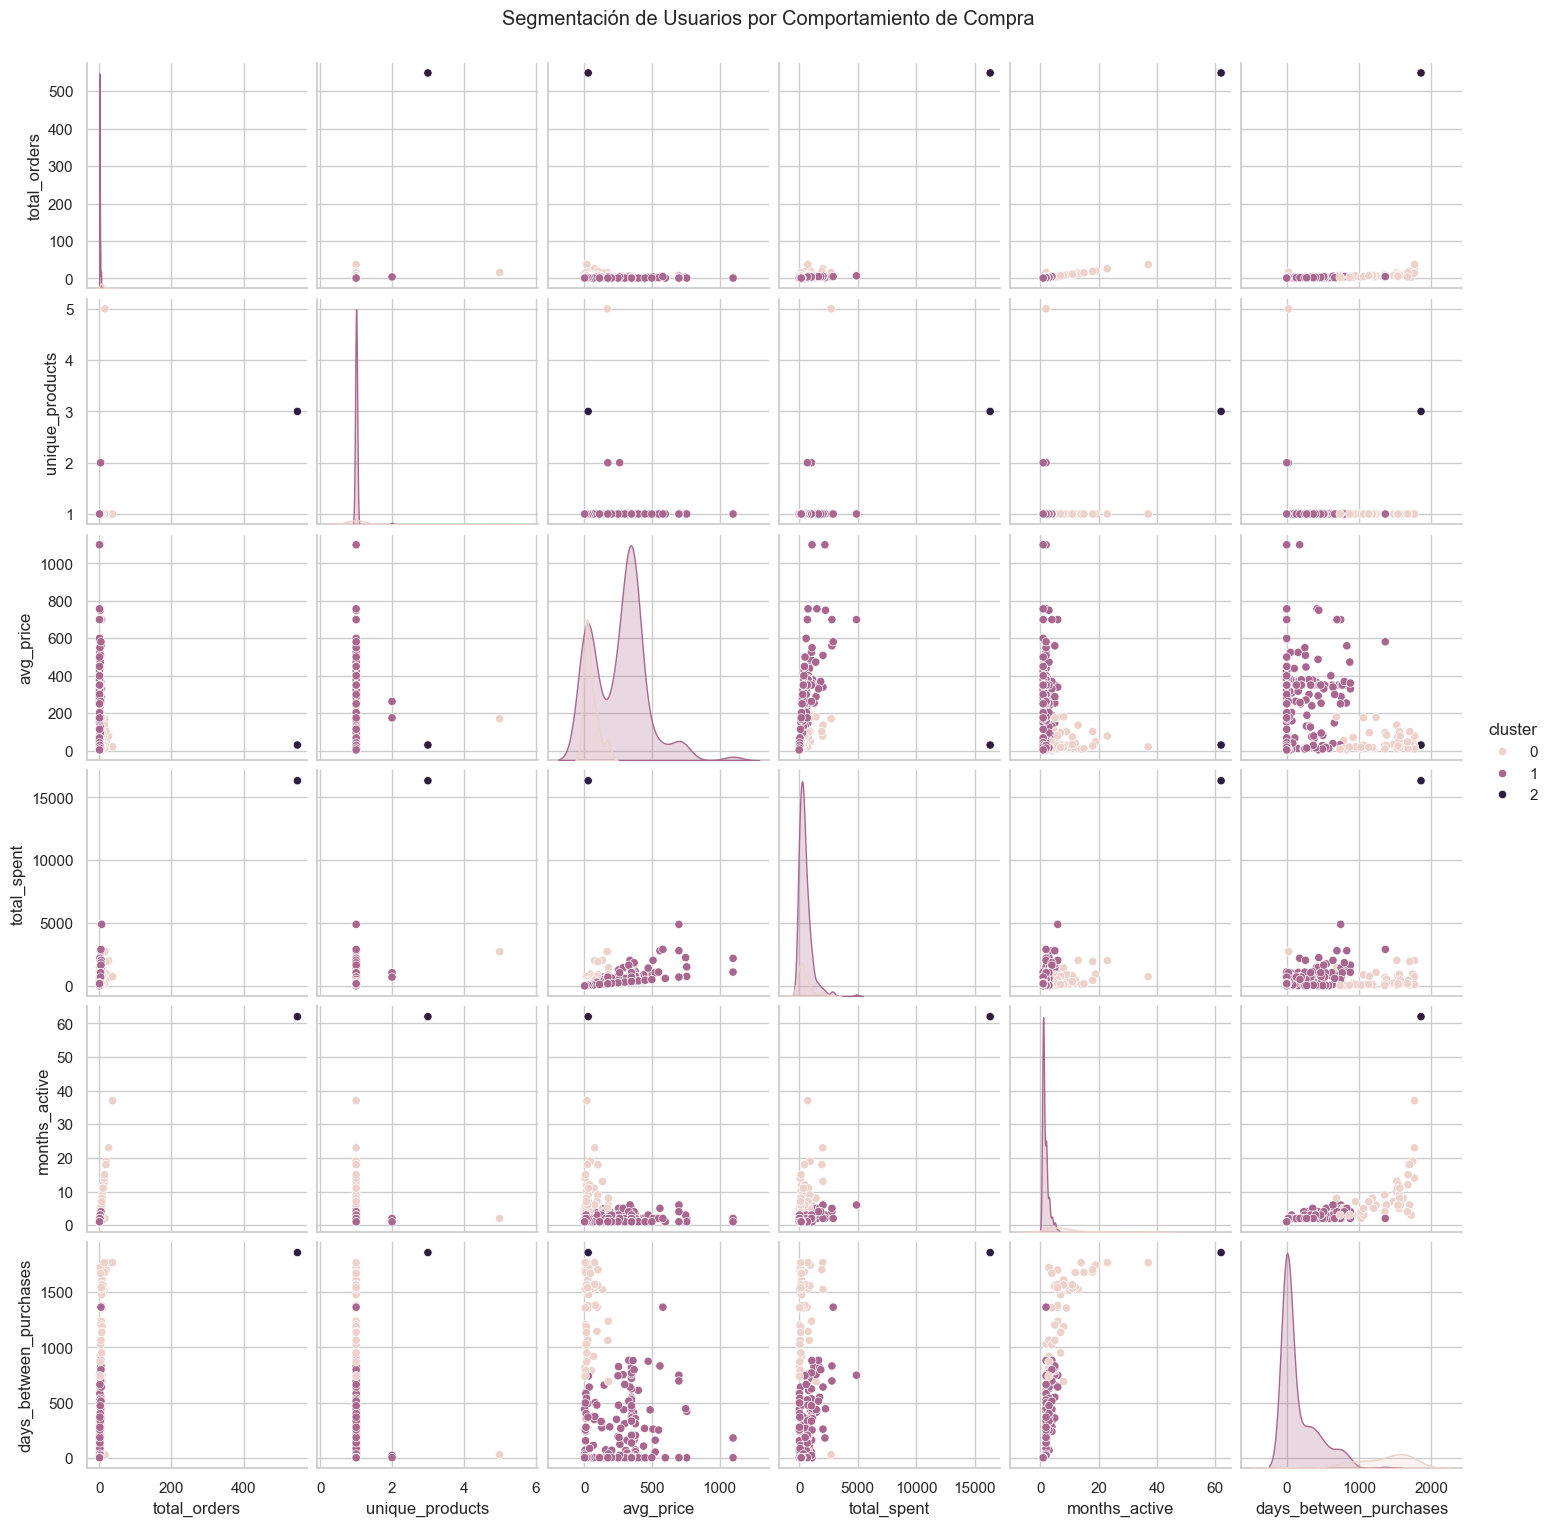

         total_orders  unique_products   avg_price   total_spent  \
cluster                                                            
0            8.854167         1.083333   51.339190    486.022292   
1            1.769517         1.007435  263.355677    486.373271   
2          549.000000         3.000000   29.752459  16334.100000   

         months_active  days_between_purchases  
cluster                                         
0             8.354167             1335.312500  
1             1.691450              155.817844  
2            62.000000             1860.000000  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_user, hue='cluster', vars=features)
plt.suptitle("Segmentación de Usuarios por Comportamiento de Compra", y=1.02)
plt.show()

# Estadísticas por clúster
print(df_user.groupby('cluster')[features].mean())


In [ ]:
import pandas as pd

# Agrupar por usuario y generar estadísticas de comportamiento
df_user = df.groupby('User ID').agg({
    'Order Id': 'count',         # Cantidad de órdenes
    'Product Id': 'nunique',     # Diversidad de productos
    'Price': ['mean', 'sum']     # Precio medio y total gastado
}).reset_index()

# Renombrar columnas
df_user.columns = ['User ID', 'Total_Ordenes', 'Productos_Distintos', 'Precio_Promedio', 'Gasto_Total']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_user.drop('User ID', axis=1))


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_user['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
df = df.merge(df_user[['User ID', 'Cluster']], on='User ID', how='left')


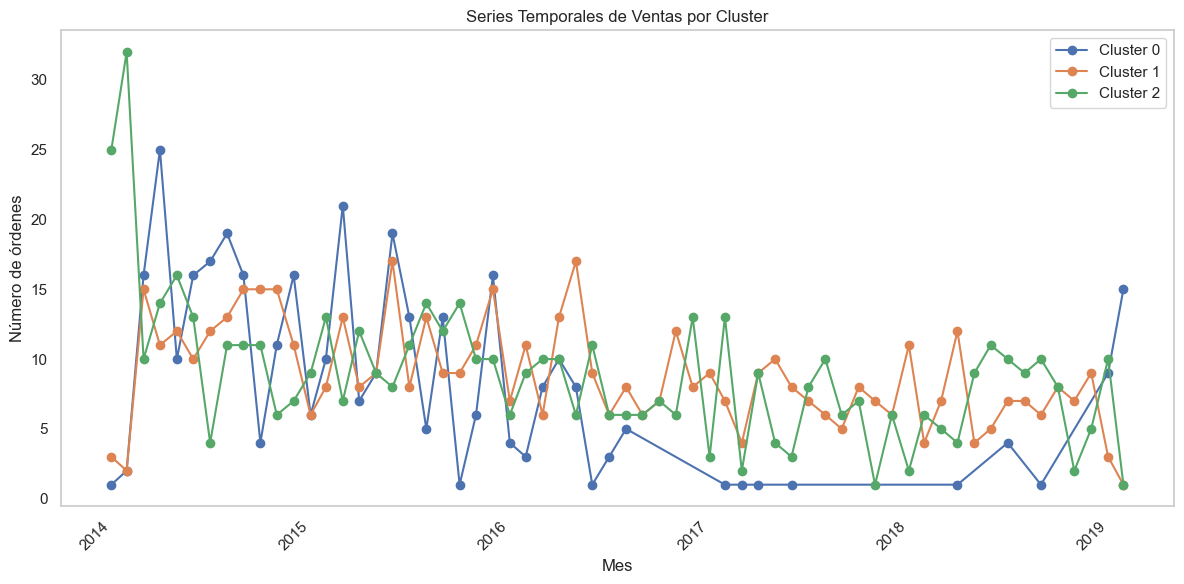

In [ ]:
# Asegurar que 'Aniomes' sea tipo datetime
df['Aniomes'] = pd.to_datetime(df['Aniomes'])

# Agrupar por mes y cluster
ventas_por_cluster = df.groupby(['Aniomes', 'Cluster'])['Order Id'].count().reset_index()

# Asegurar orden correcto por fecha
ventas_por_cluster = ventas_por_cluster.sort_values('Aniomes')

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for c in ventas_por_cluster['Cluster'].unique():
    subset = ventas_por_cluster[ventas_por_cluster['Cluster'] == c].sort_values('Aniomes')
    plt.plot(subset['Aniomes'], subset['Order Id'], marker='o', label=f'Cluster {c}')

plt.title('Series Temporales de Ventas por Cluster')
plt.xlabel('Mes')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['User ID', 'Order Id', 'Product Id', 'Price', 'Time', 'year', 'month',
       'Aniomes', 'Cluster'],
      dtype='object')

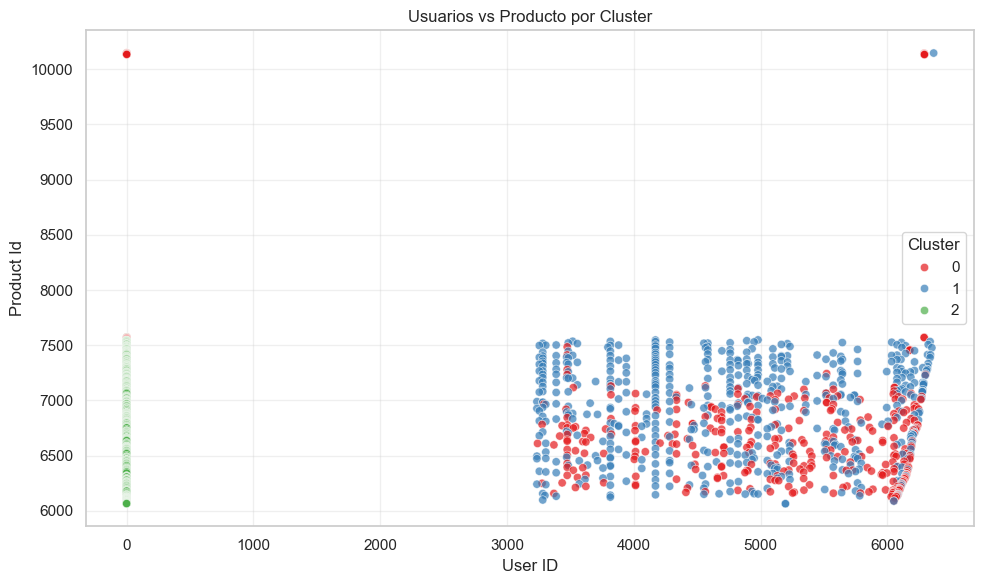

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='User ID', y='Order Id', hue='Cluster', palette='Set1', alpha=0.7)

plt.title('Usuarios vs Producto por Cluster')
plt.xlabel('User ID')
plt.ylabel('Product Id')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
demanda

,Product Id,Price,Cantidad
0,0,2.50,1
1,0,3.50,30
2,0,3.75,5
3,0,3.79,8
4,0,4.33,1
...,...,...,...
188,5756,200.00,2
189,5756,225.00,1
190,5756,525.00,1
191,7574,175.00,7


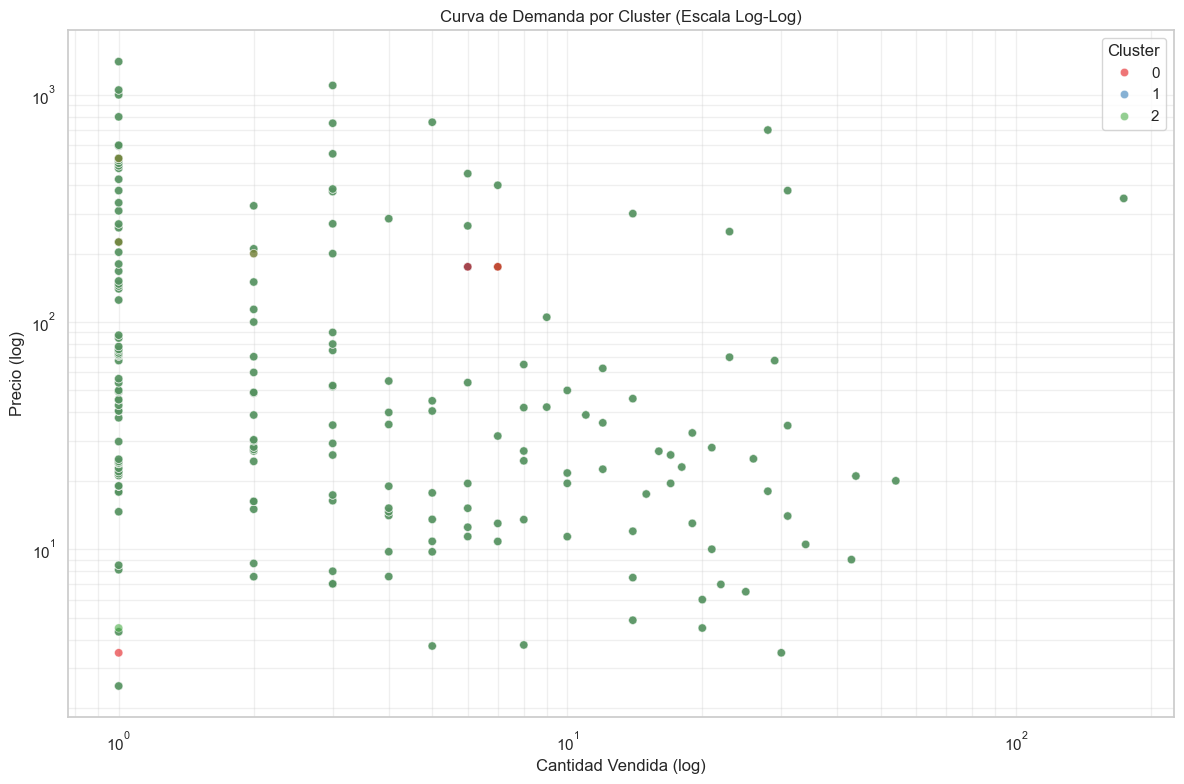


Estadísticas por Cluster:
        Cantidad                Price       
            mean median count    mean median
Cluster                                     
0           7.55    3.0   192  135.44  40.54
1           7.69    3.0   186  132.80  39.50
2           7.56    3.0   190  135.02  40.25


In [ ]:
# Preparar datos para el scatter plot
# Unir los datos de cluster con la tabla de demanda
demanda_cluster = demanda.merge(df[['Product Id', 'Cluster']].drop_duplicates(), on='Product Id', how='left')

# Asegurarse de que no hay valores nulos o cero
demanda_filtrada = demanda_cluster[(demanda_cluster['Cantidad'] > 0) & (demanda_cluster['Price'] > 0)]

# Graficar scatter plot log-log con color por cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=demanda_filtrada,
    x='Cantidad', y='Price',
    hue='Cluster', palette='Set1',
    alpha=0.6
)

plt.xscale('log')
plt.yscale('log')
plt.title('Curva de Demanda por Cluster (Escala Log-Log)')
plt.xlabel('Cantidad Vendida (log)')
plt.ylabel('Precio (log)')
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Mostrar estadísticas por cluster
print("\nEstadísticas por Cluster:")
stats_cluster = demanda_filtrada.groupby('Cluster').agg({
    'Cantidad': ['mean', 'median', 'count'],
    'Price': ['mean', 'median']
}).round(2)
print(stats_cluster)

Conclusiones Generales:

    Patrones de Comportamiento Distintos: El análisis de clústeres ha logrado identificar al menos dos o tres grupos de usuarios con comportamientos de compra distintos, lo cual es el objetivo principal del clustering.

    Identificación de Clústeres Dominantes:

        Clúster 0 (Morado/Rosa): Este clúster parece ser el más grande y homogéneo. Se caracteriza por:

            Bajo total_orders (la mayoría con pocas órdenes).

            Bajo unique_products (pocos productos únicos).

            avg_price distribuido, pero con una concentración en precios más bajos.

            Bajo total_spent (la mayoría gastando poco).

            Pocos months_active.

            days_between_purchases muestra una concentración en valores más bajos (compras más frecuentes o poca historia de compras).

            Conclusión del Clúster 0: Este clúster probablemente representa a clientes nuevos, clientes ocasionales o clientes de bajo valor. Son la mayoría de los usuarios, pero no contribuyen significativamente en términos de volumen de pedidos o gasto.

        Clúster 1 (Naranja/Café Claro): Este clúster es más pequeño que el 0, pero con características interesantes:

            Mayor total_orders que el clúster 0, abarcando un rango más amplio.

            Mayor unique_products que el clúster 0.

            avg_price similar al clúster 0, pero con algunas transacciones de mayor precio.

            total_spent significativamente más alto que el clúster 0, llegando a valores altos.

            months_active más alto y más disperso que el clúster 0, indicando mayor antigüedad o actividad.

            days_between_purchases puede variar, pero algunos tienen intervalos más largos, lo que sugiere clientes con historial o interacciones más espaciadas pero de mayor valor.

            Conclusión del Clúster 1: Este clúster podría representar a "clientes valiosos" o "clientes leales". Son usuarios que compran con más frecuencia, exploran más productos y, lo más importante, gastan significativamente más dinero. Estos son los clientes a los que la empresa debería enfocarse para retención y programas de lealtad.

        Clúster 2 (Negro/Gris Oscuro): Este clúster parece ser el más pequeño y podría representar "outliers" o un grupo de nicho muy específico. Se caracteriza por:

            Valores extremadamente altos en total_orders.

            Valores muy altos en unique_products.

            avg_price puede ser bajo o alto, pero en general parece estar en un rango similar al de otros clústeres, quizás con menos concentración.

            total_spent extremadamente alto, superando con creces a los demás clústeres.

            months_active muy alto, indicando una larga historia o actividad constante.

            days_between_purchases puede variar, pero la actividad general es muy alta.

            Conclusión del Clúster 2: Este clúster probablemente representa a "clientes VIP" o "compradores de alto volumen/frecuencia". Son una minoría, pero su impacto en el total_spent es descomunal. Podrían ser revendedores, negocios que compran al por mayor o individuos con necesidades de compra excepcionalmente altas. Requieren una atención personalizada y quizás un programa de beneficios exclusivo.

Observaciones Específicas por Variable:

    total_orders vs. total_spent: Esta relación es muy clara para diferenciar clústeres. El Clúster 0 está en la esquina inferior izquierda (pocos pedidos, poco gasto), el Clúster 1 se mueve hacia la parte superior derecha (más pedidos, más gasto), y el Clúster 2 está en el extremo superior derecho (muchos pedidos, mucho gasto).

    avg_price: Parece ser la variable menos discriminatoria entre los clústeres principales, aunque el Clúster 2 puede tener una dispersión diferente. Esto sugiere que el precio promedio de los productos comprados no es el factor principal que distingue a los clústeres, sino la cantidad de compras y el gasto total.

    months_active: Claramente diferencia a los clústeres, con el Clúster 0 teniendo una menor actividad en el tiempo, y los Clústeres 1 y 2 siendo más "antiguos" o consistentemente activos.

    days_between_purchases: Esta variable, aunque no se detalla su cálculo, también contribuye a la separación, especialmente el Clúster 0 mostrando una distribución más agrupada en valores bajos, mientras que los otros clústeres tienen una mayor dispersión, sugiriendo patrones de compra más variados o una historia más larga.

Implicaciones y Recomendaciones:

    Marketing Dirigido: Se pueden diseñar campañas de marketing específicas para cada clúster:

        Clúster 0 (Clientes Ocasionales/Nuevos): Estrategias de activación, ofertas de bienvenida, recordatorios de carritos abandonados, recomendaciones de productos populares para fomentar la primera o segunda compra y aumentar su engagement.

        Clúster 1 (Clientes Valiosos/Leales): Programas de lealtad, descuentos exclusivos para repetición de compra, lanzamientos anticipados de productos, comunicación personalizada para mantener su lealtad.

        Clúster 2 (Clientes VIP/Alto Gasto): Manejo de cuentas VIP, servicio al cliente premium, ofertas personalizadas de productos de alto valor, invitaciones a eventos exclusivos.

    Optimización de Inventario: Entender qué productos son populares en cada clúster puede ayudar a optimizar el inventario.

    Gestión de Relación con el Cliente (CRM): Personalizar la comunicación y el soporte al cliente según el clúster.

    Prevención de Abandono (Churn): Monitorear los clientes del Clúster 1 y 2 que muestren signos de disminución de actividad para aplicar estrategias de retención.

En resumen, el análisis de clústeres ha proporcionado una segmentación significativa de los usuarios basada en su comportamiento de compra, permitiendo a la empresa entender mejor a su base de clientes y tomar decisiones estratégicas más informadas.